<a href="https://colab.research.google.com/github/ishakale0908/Data-Sci-skill-/blob/main/heart_disease7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd\n160,12,5.73,23.11,Present,49,25.3,97.2,52,1\n144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1\n118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0\n170,7.5,6.41,38.03,Present,51,31.99,24.26,58,1\n134,13.6,3.5,27.78,Present,60,25.99,57.34,49,1\n132,6.2,6.47,36.21,Present,62,30.77,14.14,45,0\n142,4.05,3.38,16.2,Absent,59,20.81,2.62,38,0\n114,4.08,4.59,14.6,Present,62,23.11,6.72,58,1\n114,0,3.83,19.4,Present,49,24.86,2.49,29,0\n132,0,5.8,30.96,Present,69,30.11,0,53,1\n206,6,2.95,32.27,Absent,72,26.81,56.06,60,1\n134,14.1,4.44,22.39,Present,65,23.09,0,40,1\n118,0,1.88,10.05,Absent,59,21.57,0,17,0\n132,0,1.87,17.21,Absent,49,23.63,0.97,15,0\n112,9.65,2.29,17.2,Present,54,23.53,0.68,53,0\n117,1.53,2.44,28.95,Present,35,25.89,30.03,46,0\n120,7.5,15.33,22,Absent,60,25.31,34.49,49,0\n146,10.5,8.29,35.36,Present,78,32.73,13.89,53,1\n158,2.6,7.46,34.07,Present,61,29.3,53.28,62,1\n124,14,6.23,35.96,Present,45,30.09,0,59,1\n10

In [3]:
#loading dataset
import pandas as pd
df=pd.read_csv("heart.csv")
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


variables:



1.   sbp: Systolic blood pressure
2.   tobacco: Cumulative tobacco consumption, in kg
3.   ldl: Low-density lipoprotein cholesterol
4.   adiposity: Adipose tissue concentration
5.   famhist: Family history of heart disease (1=Present, 0=Absent)
6.   typea: Score on test designed to measure type-A behavior
7.   obesity: Obesity
8.   alcohol: Current consumption of alcohol
9.   age: Age of subject
10.  chd: Coronary heart disease at baseline; 1=Yes 0=No



In [4]:
#EDA
print(df.shape)
print(df.info())
print(df.describe())
print("Null values: ", df.isnull().sum())
print("Duplicate values: ", df.duplicated().sum())

(462, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB
None
              sbp     tobacco         ldl   adiposity       typea     obesity  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   138.326840    3.635649    4.740325   25.406732   53.103896   26.044113   
std     20.496317    4.593024    2.070909    7.780699    9.817534    4.213680   
min    101.00

Exploratory Data Analysis (EDA) involves analyzing and summarizing the main characteristics of a dataset to understand its structure, detect patterns, spot anomalies, and test hypotheses. The goal of EDA is to uncover insights about the data, which will guide feature engineering, model selection, and other steps in the machine learning pipeline.

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["famhist"]=le.fit_transform(df["famhist"])
df.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


Label Encoding : Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

One-hot encoding is a technique used in machine learning to convert categorical data into a binary (0 or 1) matrix. It's commonly used to represent categorical variables as input to machine learning algorithms.

Here’s how it works:

Categorical variables (like "Red," "Green," "Blue") are represented by assigning a separate binary column for each category.
For each observation, only the column corresponding to the category is set to 1, while all others are set to 0.


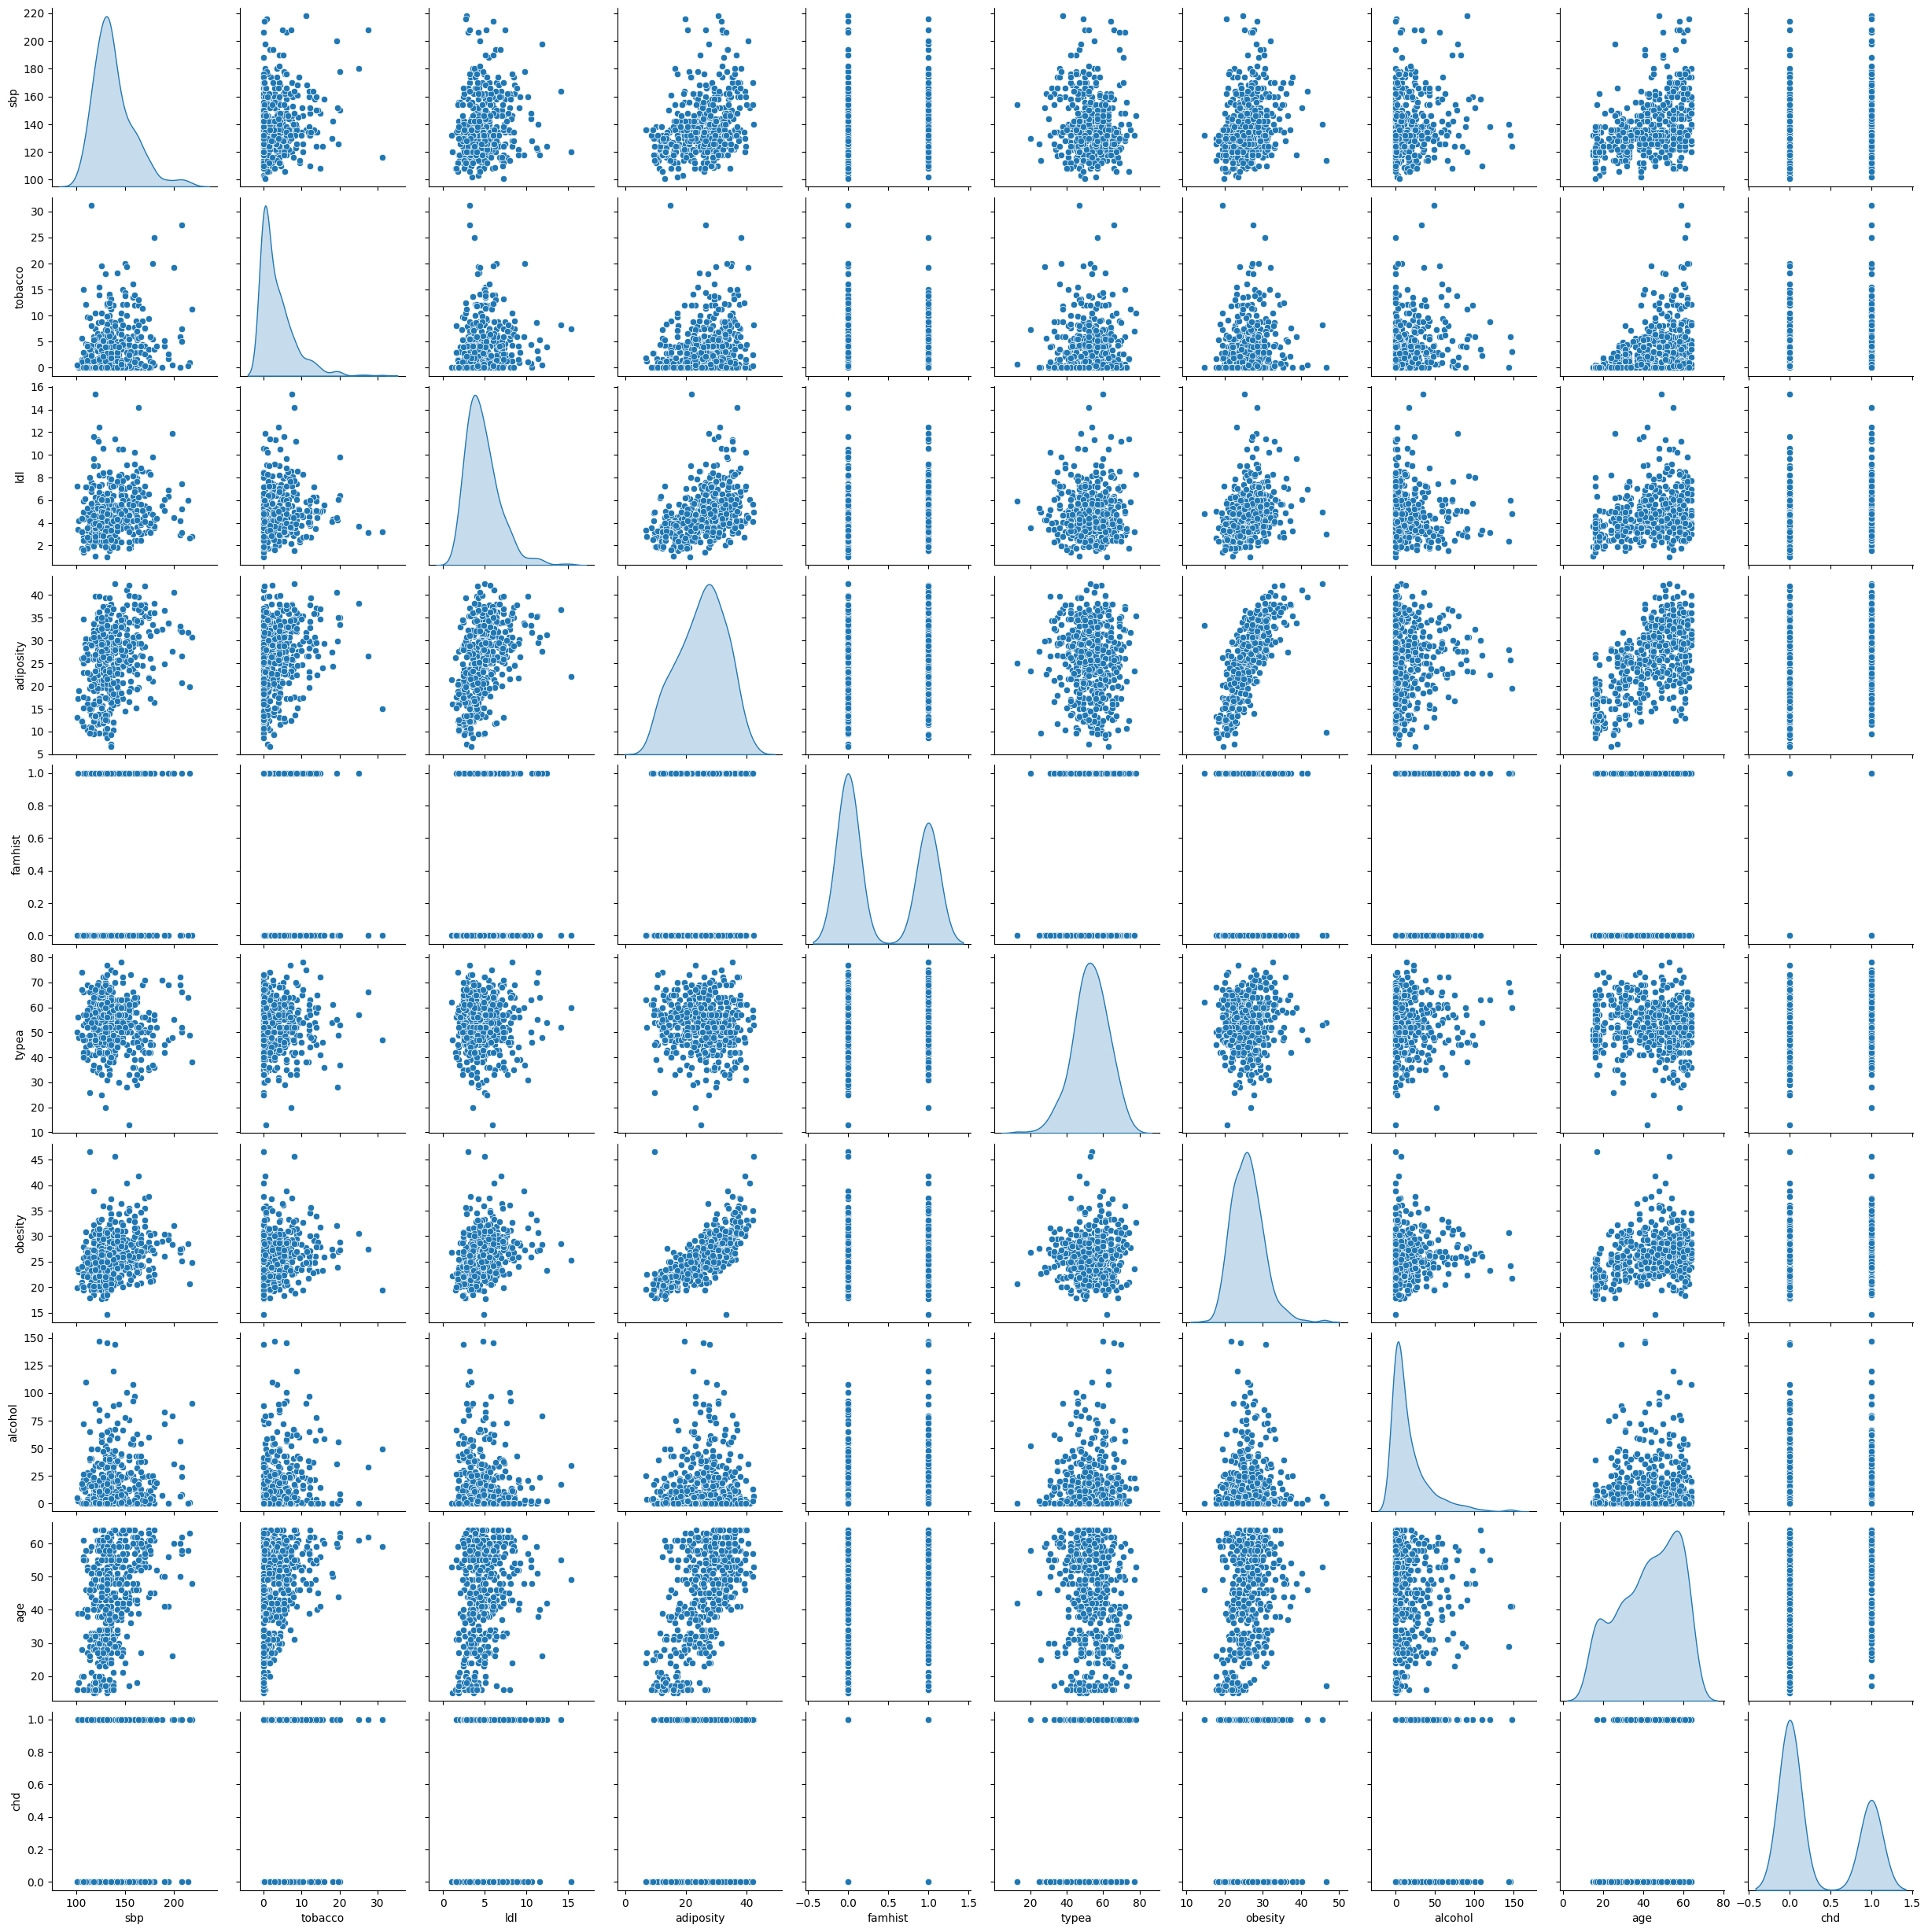

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, diag_kind="kde")
plt.show()

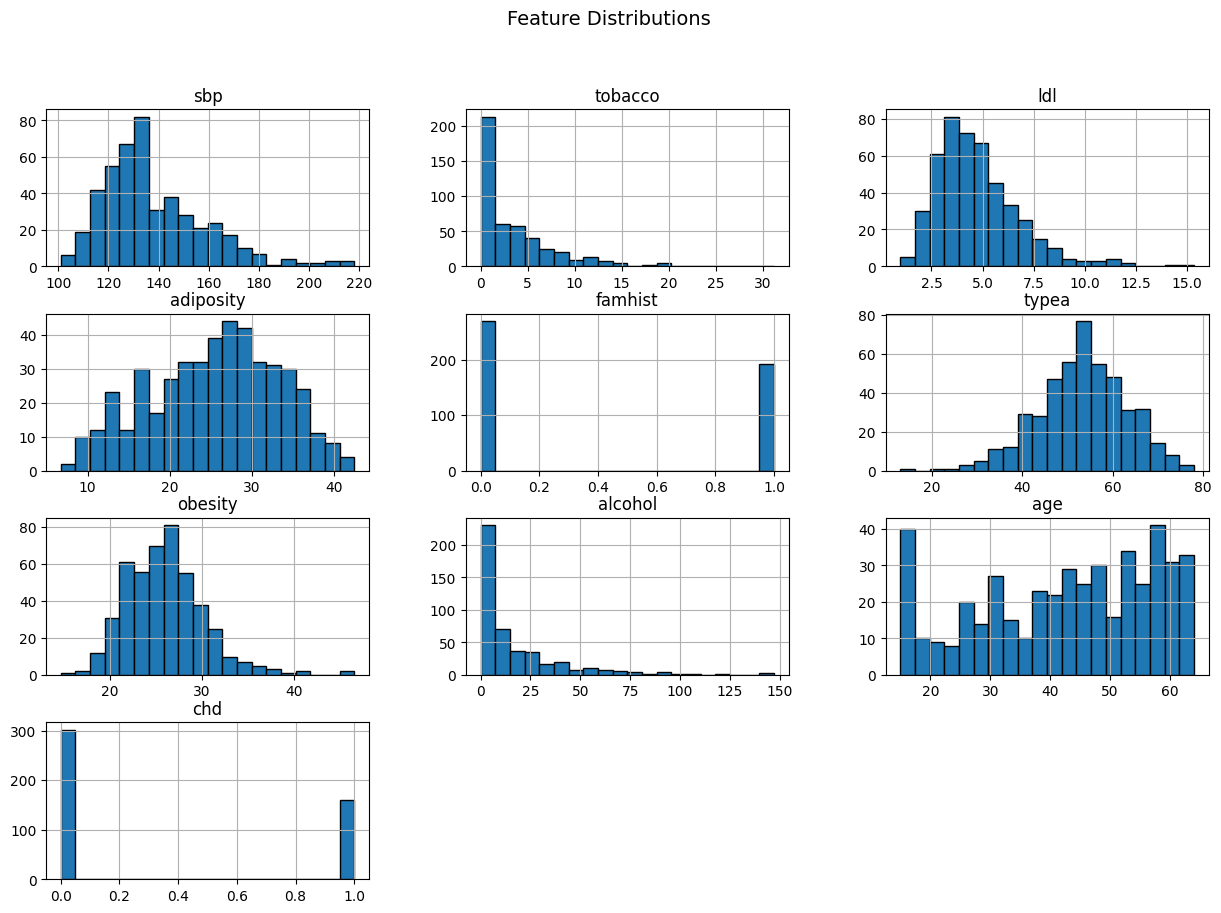

In [7]:
df.hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

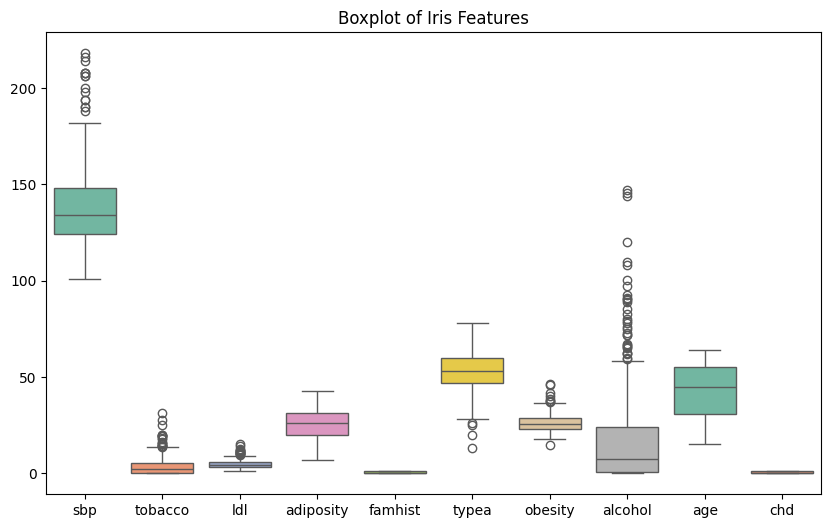

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette="Set2")
plt.title("Boxplot of Iris Features")
plt.show()

In [9]:
def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers by filtering the data
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return filtered_df

for column in df.columns:
    df = remove_outliers(df, column)

The Interquartile Range (IQR) method is a widely used technique for detecting outliers in a dataset. It involves using the spread of the middle 50% of the data (the interquartile range) to identify values that are significantly lower or higher than typical data points. These extreme values are often considered outliers.

Q1 (25th percentile): The point below which 25% of the data lies.

Q3 (75th percentile): The point below which 75% of the data lies.

IQR: The range between Q1 and Q3, showing the spread of the middle 50% of the data.

Lower and Upper Bound: These bounds define the range where typical data points lie. Any value outside this range is considered an outlier.

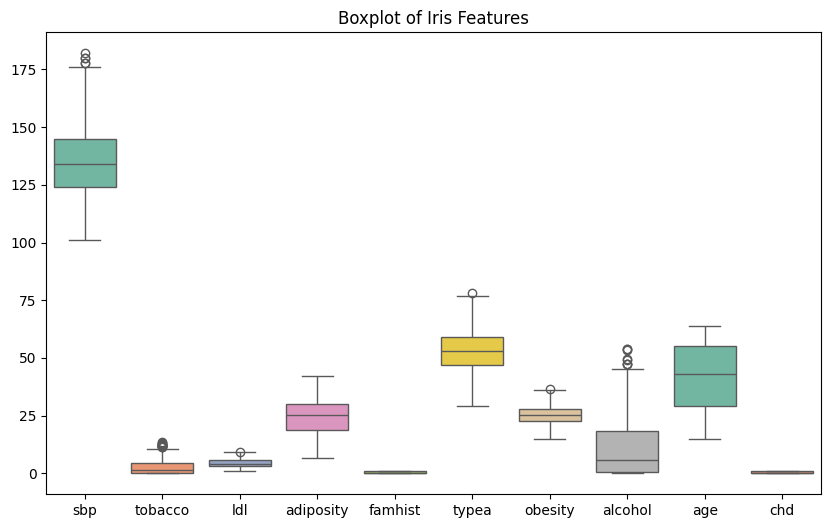

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette="Set2")
plt.title("Boxplot of Iris Features")
plt.show()

Min-Max Scaling (also known as Normalization) is a method used to scale numerical data into a specific range, typically between 0 and 1. This technique is commonly used in machine learning to ensure that all features contribute equally to the model, especially when features have different units or ranges.

Formula:

X_scaled = (X - X_min) / (X_max - X_min)



In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,0.530864,0.000741,0.417783,0.617273,0.0,0.530612,0.651195,0.038148,0.979592,1.0
1,0.209877,0.005926,0.304507,0.720858,1.0,0.469388,0.663603,0.070556,0.632653,0.0
2,0.851852,0.555556,0.661389,0.883150,1.0,0.448980,0.794577,0.449259,0.877551,1.0
3,0.382716,0.459259,0.668697,0.831781,1.0,0.673469,0.738511,0.261852,0.612245,0.0
4,0.506173,0.300000,0.292326,0.267005,0.0,0.612245,0.280790,0.048519,0.469388,0.0


Feature Selection Techniques :

Correlation Coefficient – Pearson’s Correlation Coefficient is a measure of quantifying the association between the two continuous variables and the direction of the relationship with its values ranging from -1 to 1.

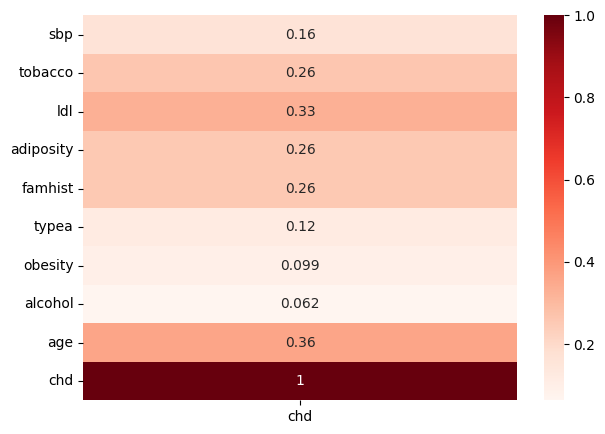

In [12]:
#sns.heatmap(df.corr(), annot=True)
target_correlation = df.corr()[['chd']]
plt.figure(figsize=(7,5))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
target_correlation[abs(target_correlation)>0.2].dropna()

,chd
tobacco,0.261096
ldl,0.326943
adiposity,0.255222
famhist,0.255150
age,0.360714
chd,1.000000


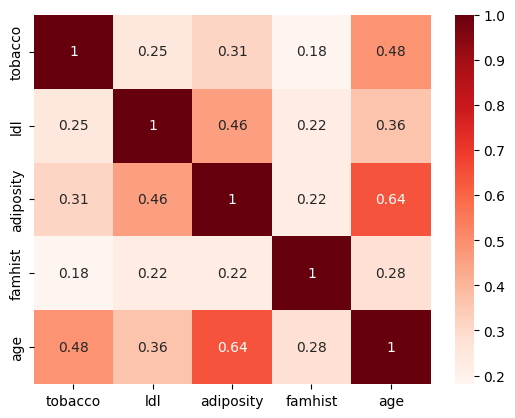

In [14]:
sns.heatmap(df.corr().loc[['tobacco', 'ldl', 'adiposity', 'famhist', 'age'], ['tobacco', 'ldl', 'adiposity', 'famhist', 'age']], annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Train set: The training dataset is a set of data that was utilized to fit the model. The dataset on which the model is trained. This data is seen and learned by the model.

Test set: The test dataset is a subset of the training dataset that is utilized to give an accurate evaluation of a final model fit.

validation set: A validation dataset is a sample of data from your model’s training set that is used to estimate model performance while tuning the model’s hyperparameters.

In [16]:
X=df.drop("chd", axis=1)
y=df["chd"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

Chi-square test — Chi-square method (X2) is generally used to test the relationship between categorical variables. It compares the observed values from different attributes of the dataset to its expected value.

In [17]:
#chi square test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [18]:
#chi2
selector = SelectKBest(score_func=chi2, k='all')  # k='all' to get scores for all features
selector.fit(X, y)

SelectKBest(k='all', score_func=<function chi2 at 0x7fecfe625620>)

In [19]:
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Score': selector.scores_
})

# Sort features by Chi-Square score
sorted_features = feature_scores.sort_values(by='Chi-Square Score', ascending=False)

# Display the sorted features
print(sorted_features)

     Feature  Chi-Square Score
4    famhist         14.452509
8        age          8.591880
1    tobacco          7.236940
2        ldl          4.197214
3  adiposity          2.320608
0        sbp          1.020127
7    alcohol          0.430024
5      typea          0.389594
6    obesity          0.220694


Information Gain – It is defined as the amount of information provided by the feature for identifying the target value and measures reduction in the entropy values. Information gain of each attribute is calculated considering the target values for feature selection.

In [20]:
#Information Gain
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [21]:
#IG
selector = SelectKBest(score_func=mutual_info_classif, k='all')  # k='all' to get scores for all features
selector.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x7fecfe5dee80>)

In [22]:
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Information Gain (Mutual Info)': selector.scores_
})

# Sort features by Information Gain
sorted_features = feature_scores.sort_values(by='Information Gain (Mutual Info)', ascending=False)

# Display the sorted features
print(sorted_features)

     Feature  Information Gain (Mutual Info)
8        age                        0.065813
2        ldl                        0.030907
5      typea                        0.016760
0        sbp                        0.011744
6    obesity                        0.001710
4    famhist                        0.000000
3  adiposity                        0.000000
1    tobacco                        0.000000
7    alcohol                        0.000000


ANOVA (Analysis of Variance) feature selection measures the statistical significance of the difference between the means of different groups to determine if a feature is relevant for distinguishing between classes.

In [23]:
#ANOVA
selector = SelectKBest(score_func=f_classif, k='all') # k='all' to select all features
selector.fit(X_train, y_train)

# Get the p-values for each feature
p_values = selector.pvalues_

# Print the p-values
print(p_values)

# Select the features with p-values below the significance level (e.g., 0.05)
significant_features = X_train.columns[selector.get_support()]
print("Significant Features:", significant_features)

[7.58413749e-03 4.46105444e-06 9.33312480e-09 8.00390321e-05
 1.85721938e-06 5.89941597e-02 2.42532628e-01 5.19411895e-01
 7.19864570e-09]
Significant Features: Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age'],
      dtype='object')


In [24]:
#Feature Importance using Random Forests
from sklearn.ensemble import RandomForestClassifier

In [25]:
model1 = RandomForestClassifier(n_estimators=100)
model1.fit(X, y)


RandomForestClassifier()

Text(0.5, 0, 'Feature Importance')

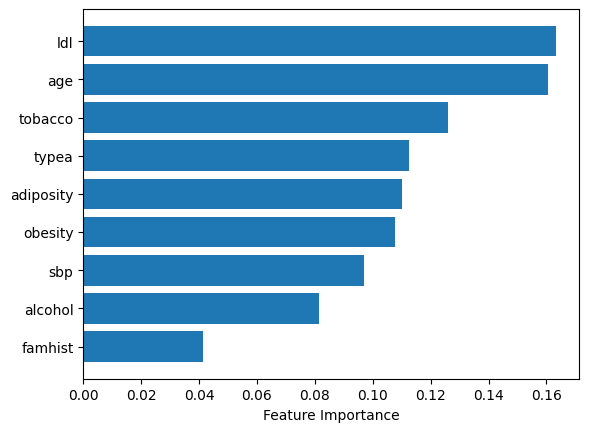

In [26]:
sort = model1.feature_importances_.argsort()

plt.barh(X.columns[sort], model1.feature_importances_[sort])

plt.xlabel("Feature Importance")

In [27]:
feature_importance = model1.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

     Feature  Importance
2        ldl    0.163164
8        age    0.160632
1    tobacco    0.125953
5      typea    0.112689
3  adiposity    0.110020
6    obesity    0.107849
0        sbp    0.096993
7    alcohol    0.081377
4    famhist    0.041324


In [30]:
model=LogisticRegression(C=1, penalty='l2')
model.fit(X_train,y_train)

LogisticRegression(C=1)

Recursive Feature Elimination (RFE): Recursively remove features with the least importance and retrain the model.

In [28]:
from sklearn.feature_selection import RFE

In [34]:
rfe = RFE(estimator=model, n_features_to_select=5)

rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]

print("Selected Features using RFE:", selected_features)

Selected Features using RFE: Index(['tobacco', 'ldl', 'famhist', 'typea', 'age'], dtype='object')


In [31]:
print ('Training Accuracy: %.2f' % model.score(X_train,y_train))
print ('Test Accuracy: %.2f' % model.score(X_test,y_test))

Training Accuracy: 0.78
Test Accuracy: 0.75


In [32]:
expected = y_test
predicted = model.predict(X_test)

In [33]:
print(classification_report(expected, predicted))
print(confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84        79
         1.0       0.68      0.37      0.48        35

    accuracy                           0.75       114
   macro avg       0.73      0.65      0.66       114
weighted avg       0.74      0.75      0.73       114

[[73  6]
 [22 13]]
